In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from agents.pgp.pgp_softmax import SoftMaxPGP
from environments.mutantworlds.mutantworlds_classic import MutantCross
from environments.mutantworlds.mutantworld import freeze_mutant_world
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from plots.agent_plotter import AgentPlotter
from utils import policy_tools
from matplotlib import pyplot as plt

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


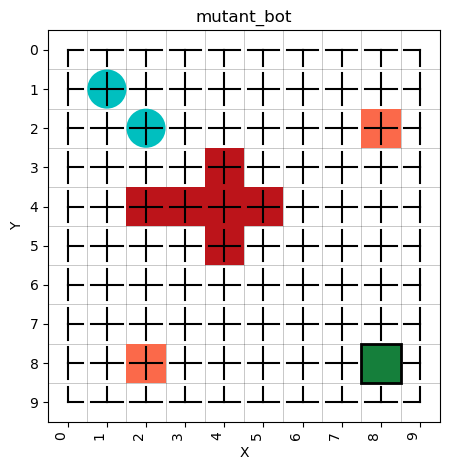

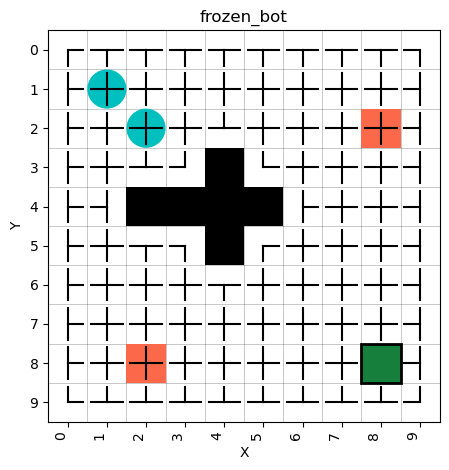

In [3]:
mutant_world = MutantCross()
frozen_world = freeze_mutant_world(mutant_world)

mutant = SoftMaxPGP(mutant_world, name="mutant_bot")
frozen = SoftMaxPGP(frozen_world, name="frozen_bot")

viz_mutant = GridWorldVisualizer(mutant_world, mutant)
viz_frozen = GridWorldVisualizer(frozen_world, frozen)
plotter = AgentPlotter([mutant, frozen])

viz_mutant.plot_policy()
plt.title(viz_mutant.agent.name)
plt.tight_layout()
plt.show()

viz_frozen.plot_policy()
plt.title(viz_frozen.agent.name)
plt.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:01<00:00, 586.98it/s]


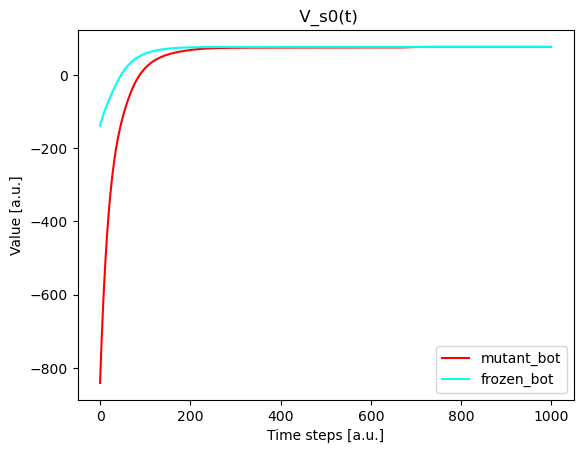

In [4]:
mutant.learn()
frozen.learn()
plotter.plotValue()

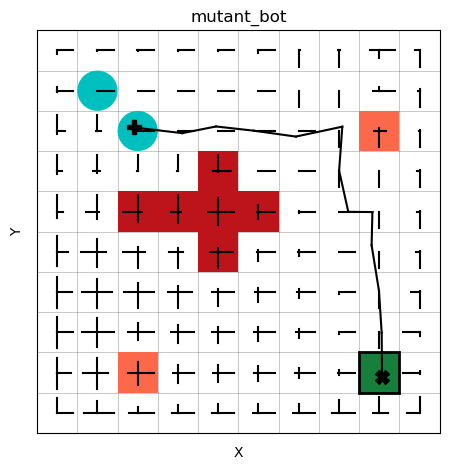

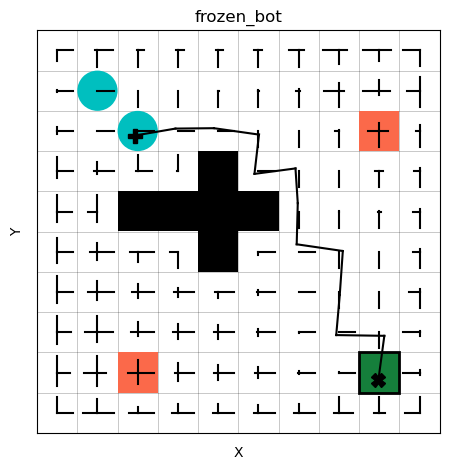

In [5]:
viz_mutant.plot_policy()
viz_mutant.plot_trajectory(plot_maze=False, plot_axis=False)
plt.title(viz_mutant.agent.name)
plt.tight_layout()
plt.show()

viz_frozen.plot_policy()
viz_frozen.plot_trajectory(plot_maze=False, plot_axis=False)
plt.title(viz_frozen.agent.name)
plt.tight_layout()
plt.show()

Mutation #1


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 629.39it/s]


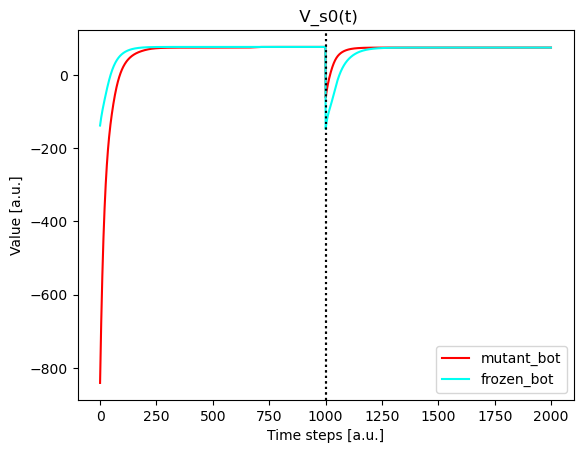

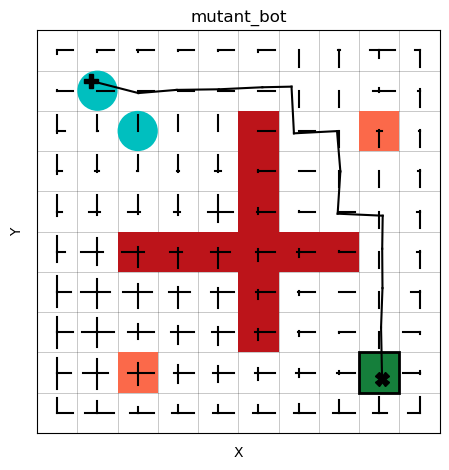

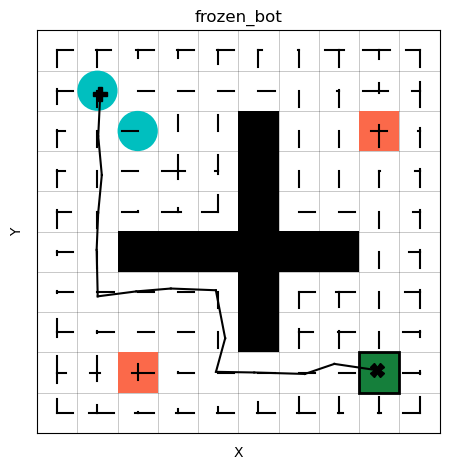

Mutation #2


100%|██████████| 1000/1000 [00:01<00:00, 684.73it/s]


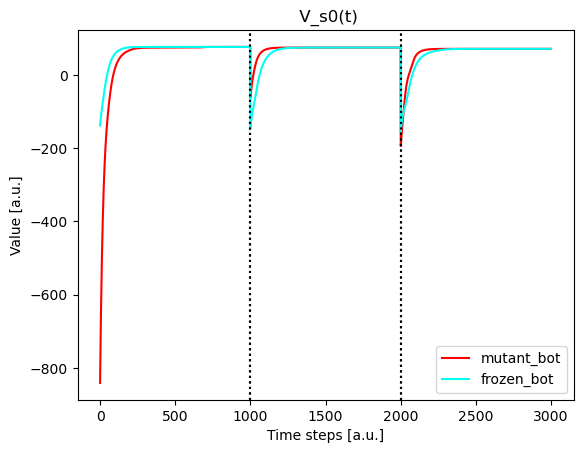

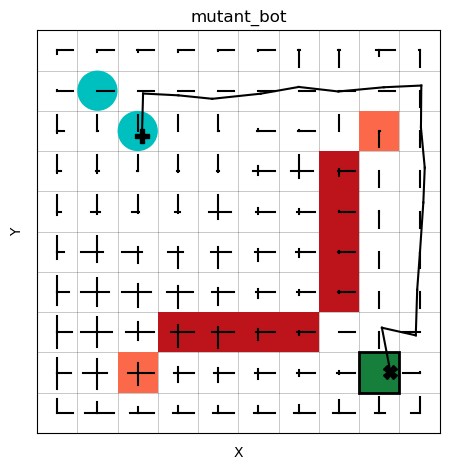

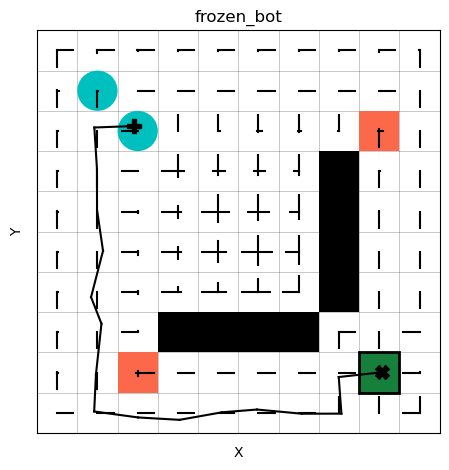

Mutation #3


100%|██████████| 1000/1000 [00:01<00:00, 696.04it/s]


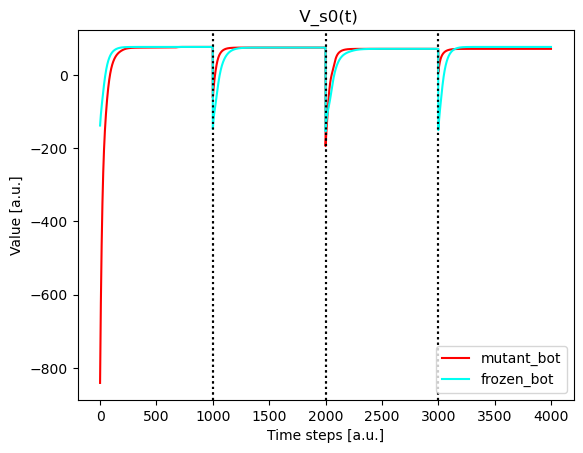

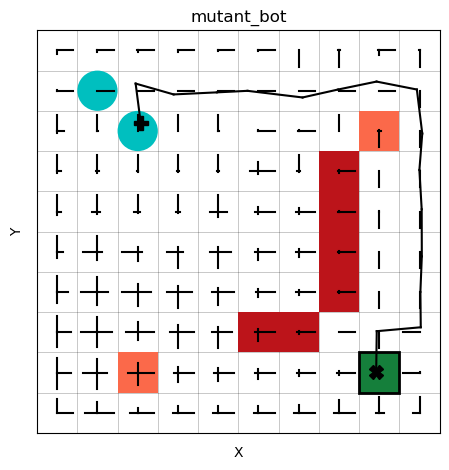

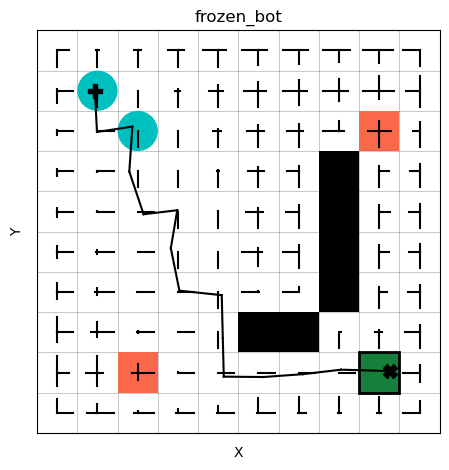

Mutation #4


100%|██████████| 1000/1000 [00:01<00:00, 605.52it/s]


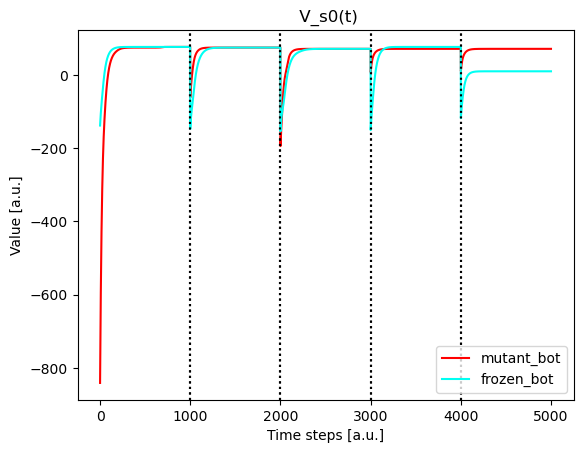

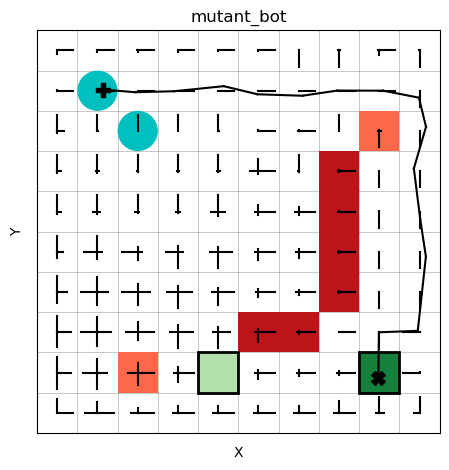

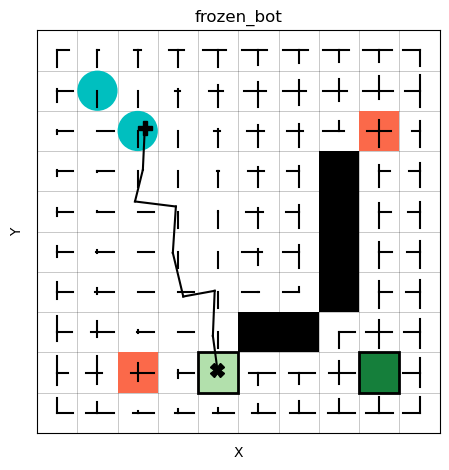

In [6]:
for i in range(1, mutant_world.n_mutations):

    print("Mutation #{}".format(i))

    mutant_world.mutate(i)
    frozen_world = freeze_mutant_world(mutant_world)
    frozen.env = frozen_world
    viz_frozen.env = frozen_world

    policy_tools.soften_softmax_policy(mutant)
    
    v_t = frozen.v_t
    epochs = frozen.epochs
    frozen.reset(clear_history=True)
    frozen.epochs = epochs
    frozen.v_t = v_t

    mutant.learn()
    frozen.learn()

    plotter.plotValue()
    plt.show()

    viz_mutant.plot_policy()
    viz_mutant.plot_trajectory(plot_maze=False, plot_axis=False)
    plt.title(viz_mutant.agent.name)
    plt.tight_layout()
    plt.show()

    viz_frozen.plot_policy()
    viz_frozen.plot_trajectory(plot_maze=False, plot_axis=False)
    plt.title(viz_frozen.agent.name)
    plt.tight_layout()
    plt.show()